<a href="https://colab.research.google.com/github/MRafliHaikal/Muhammad-Rafli-Haikal-92-praktikum-mesin-6-/blob/main/Muhammad_Rafli_Haikal_92_praktikum_mesin_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# %%
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# %%
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

iris = sklearn_to_df(datasets.load_iris())
iris.rename(columns={'target':'species'}, inplace=True)
iris.describe().T


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [4]:
# %%
iris.head(10)
print(iris)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

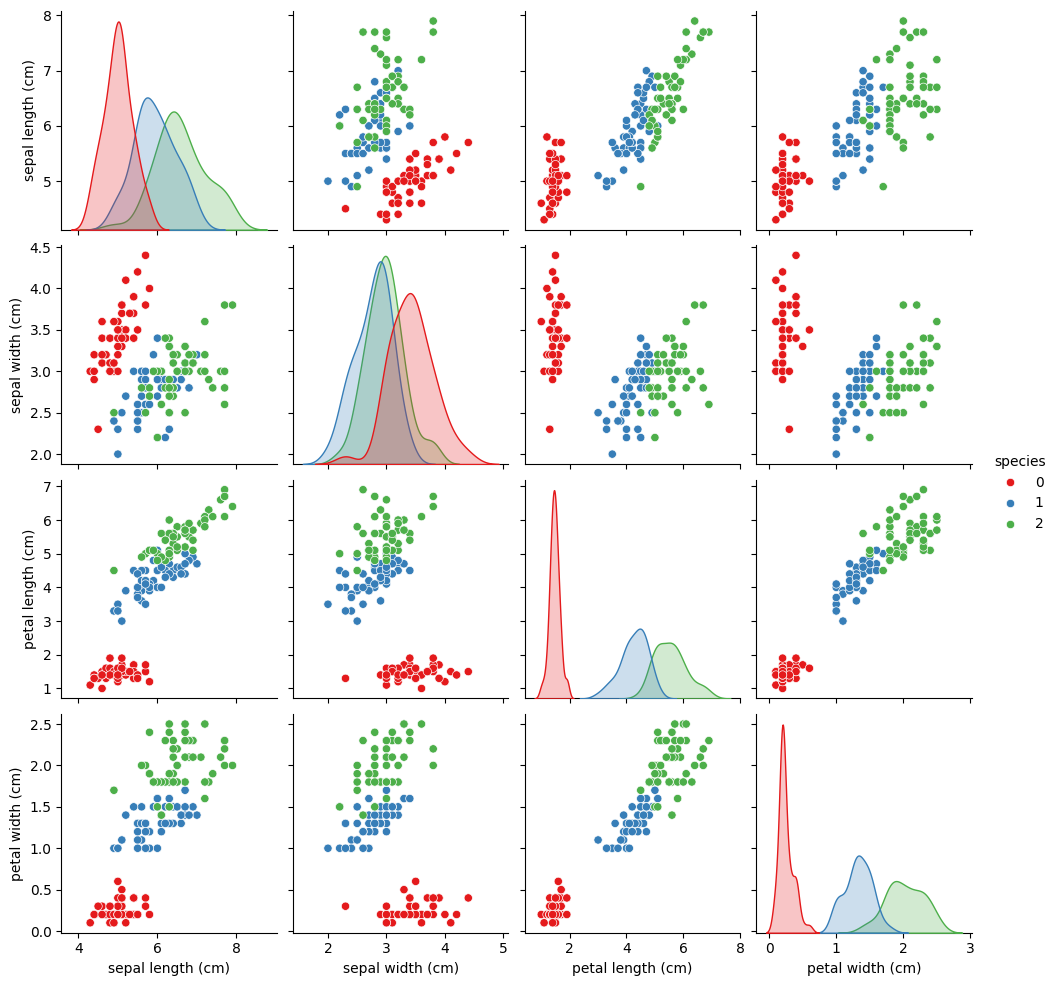

In [5]:
# %%
sns.pairplot(iris, hue='species', palette='Set1')
plt.show()


In [6]:
# %%
from sklearn.model_selection import train_test_split

x = iris.drop('species', axis=1)
y = iris['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

print("Jumlah data training:", len(x_train))
print("Jumlah data testing:", len(x_test))


Jumlah data training: 105
Jumlah data testing: 45


In [7]:
# %%
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')  # atau 'gini'
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(x_test)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
87                 6.3               2.3                4.4               1.3
111                6.4               2.7                5.3               1.9
10                 5.4               3.7                1.5               0.2
91                 6.1               3.0                4.6               1.4
49                 5.0               3.3                1.4               0.2
60                 5.0               2.0                3.5               1.0
72                 6.3               2.5                4.9               1.5
67                 5.8               2.7                4.1               1.0
39                 5.1               3.4                1.5               0.2
55                 5.7               2.8                4.5               1.3
66                 5.6               3.0                4.5               1.5
142                5.8               2.7                5.1     

In [8]:
# %%
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



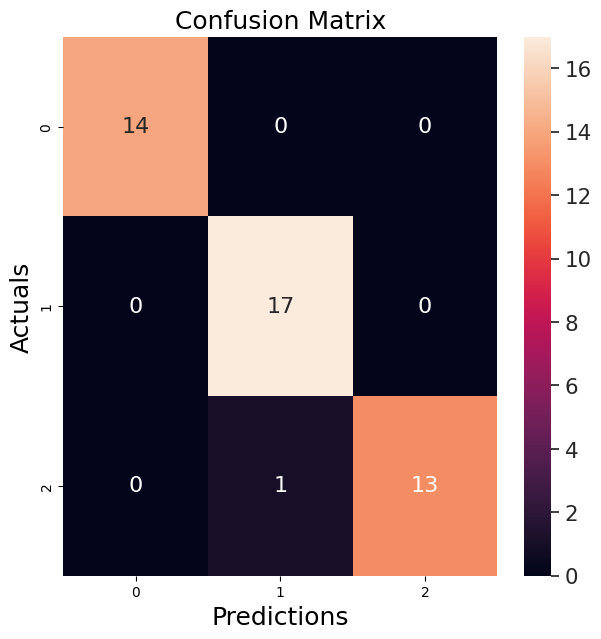

In [9]:
# %%
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,7))

sns.set(font_scale=1.4)
sns.heatmap(cm, ax=ax, annot=True, annot_kws={"size": 16})

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


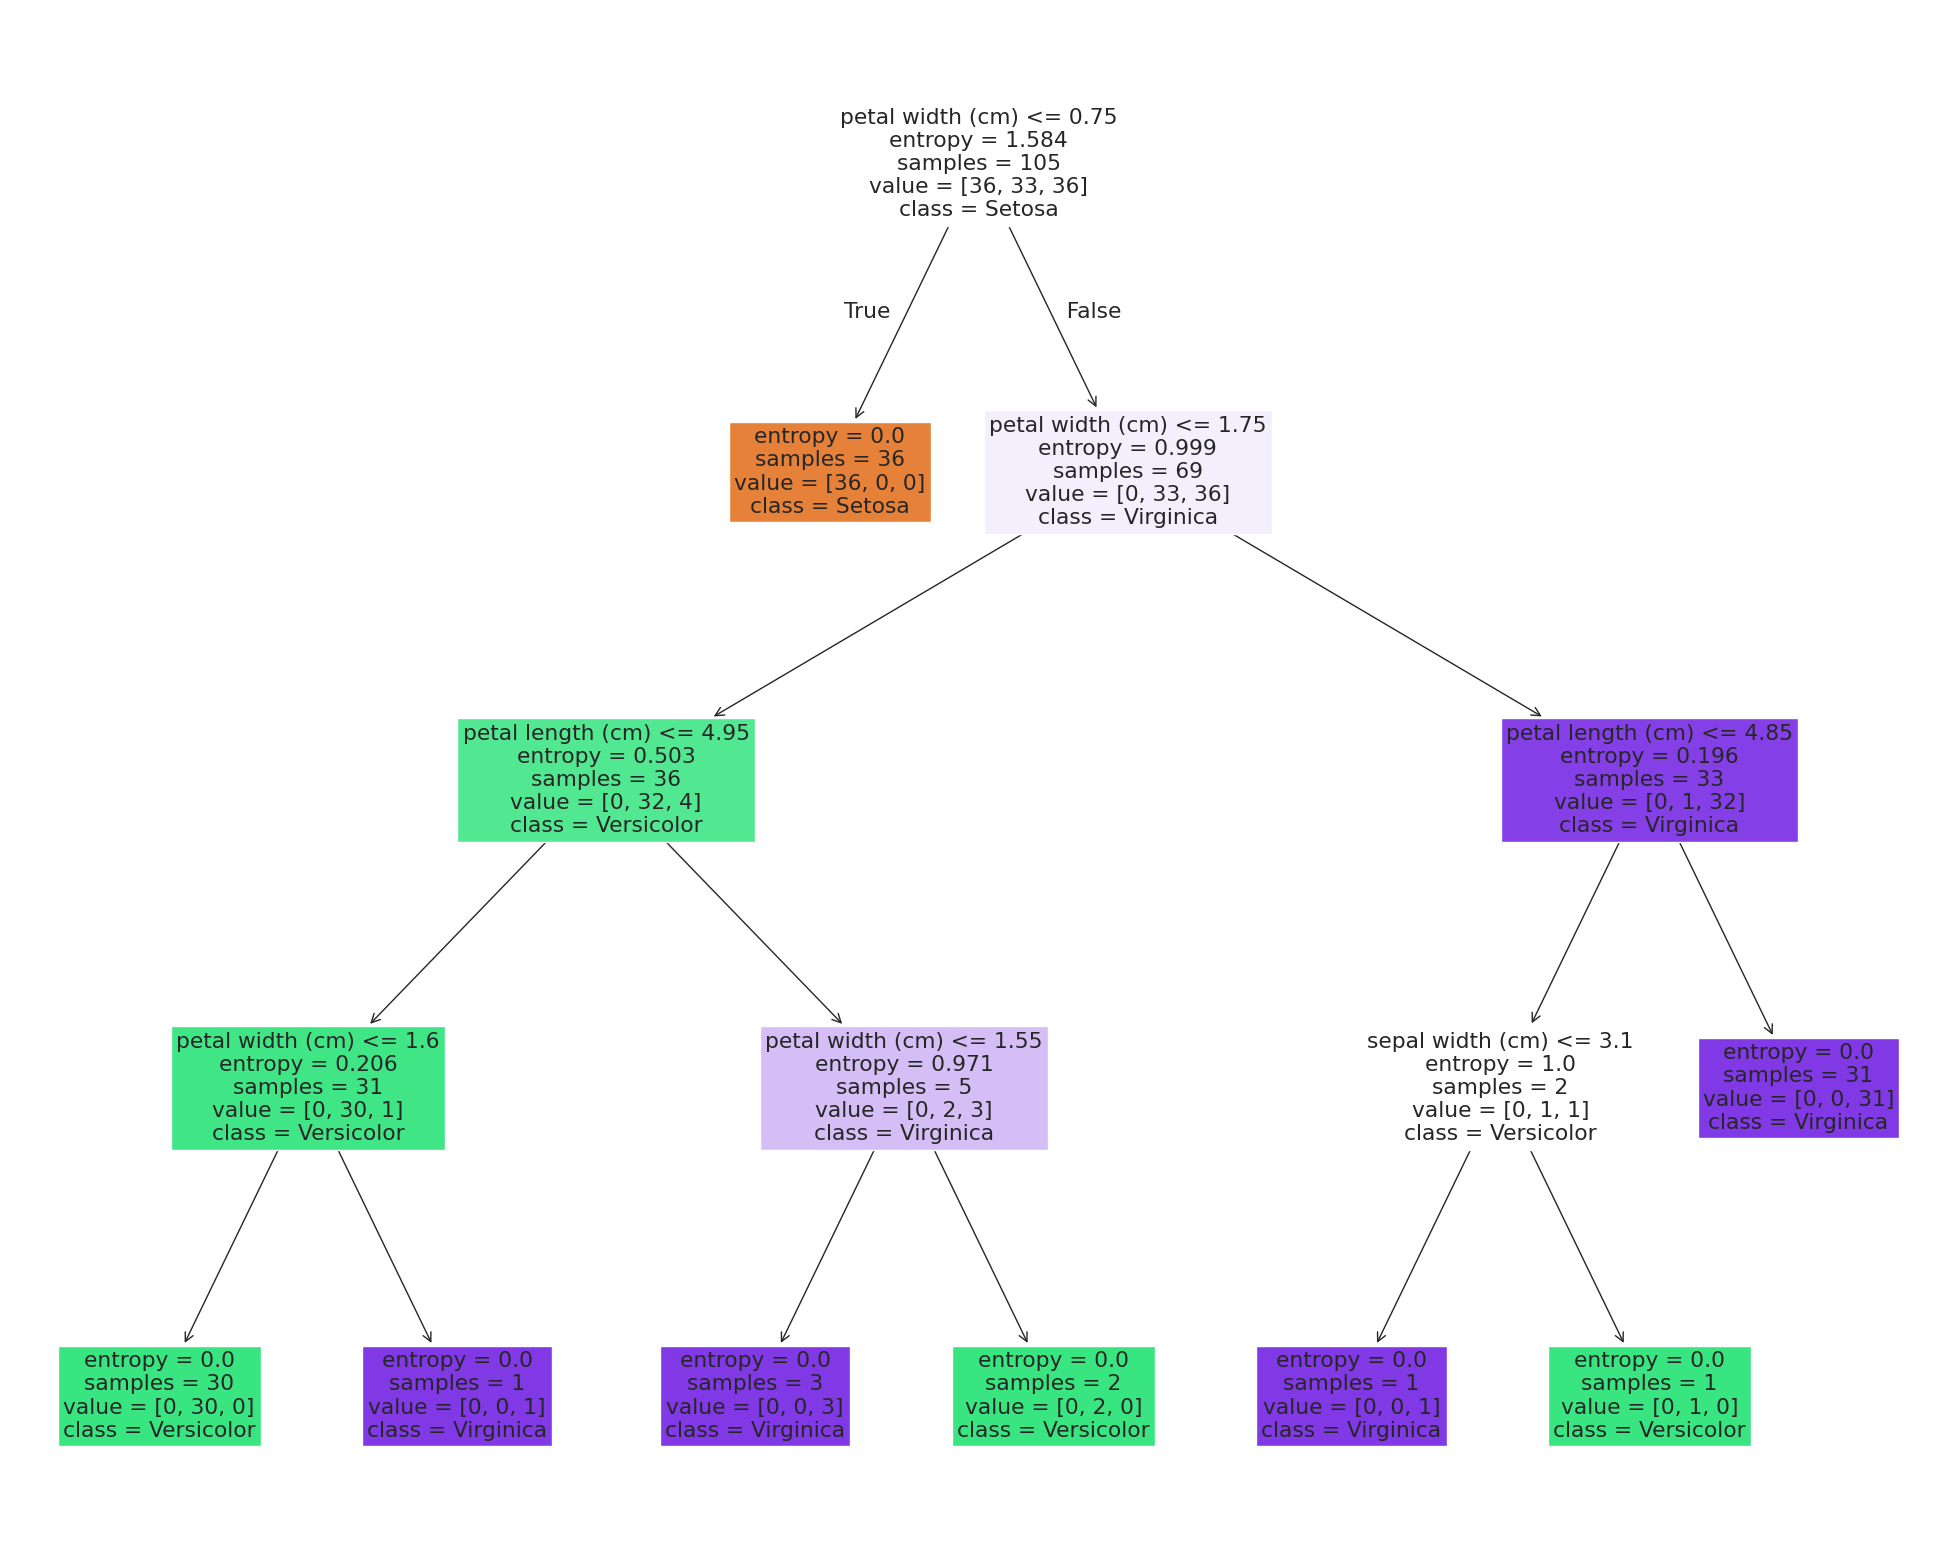

In [10]:
# %%
from sklearn import tree
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

fig, ax = plt.subplots(figsize=(25, 20))
tree.plot_tree(model, feature_names=features, class_names=['Setosa', 'Versicolor', 'Virginica'], filled=True)
plt.show()


In [12]:
# %%
iris_test_data = {
    'sepal length (cm)': 5.1,
    'sepal width (cm)': 3.5,
    'petal length (cm)': 1.4,
    'petal width (cm)': 0.1
}

feature_order = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
prediction_input_df = pd.DataFrame([iris_test_data])
prediction = model.predict(prediction_input_df[feature_order])
print("Prediksi jenis bunga:", prediction)


Prediksi jenis bunga: [0]
